In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
iris_data=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [4]:
iris_data #here we try to cluster the iris data without using the target labels

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Currently the dataset in 4D, we will reduce it to 2D for better visualisation

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(iris_data)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
X_scaled.shape

(150, 4)

In [8]:
from sklearn.decomposition import PCA #Principal Component Analysis
pca=PCA(n_components=2) #reducing to 2 dimensions
pca_scaled=pca.fit_transform(X_scaled)
pca_scaled.shape

(150, 2)

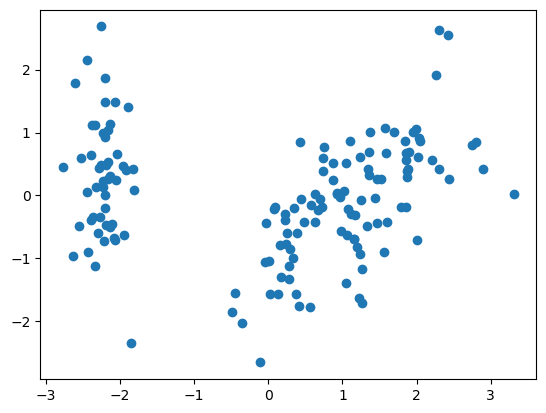

In [9]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

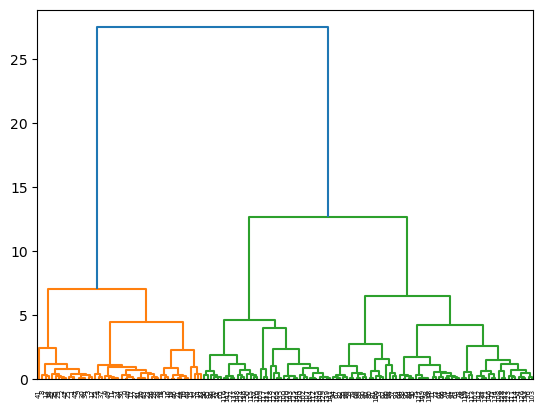

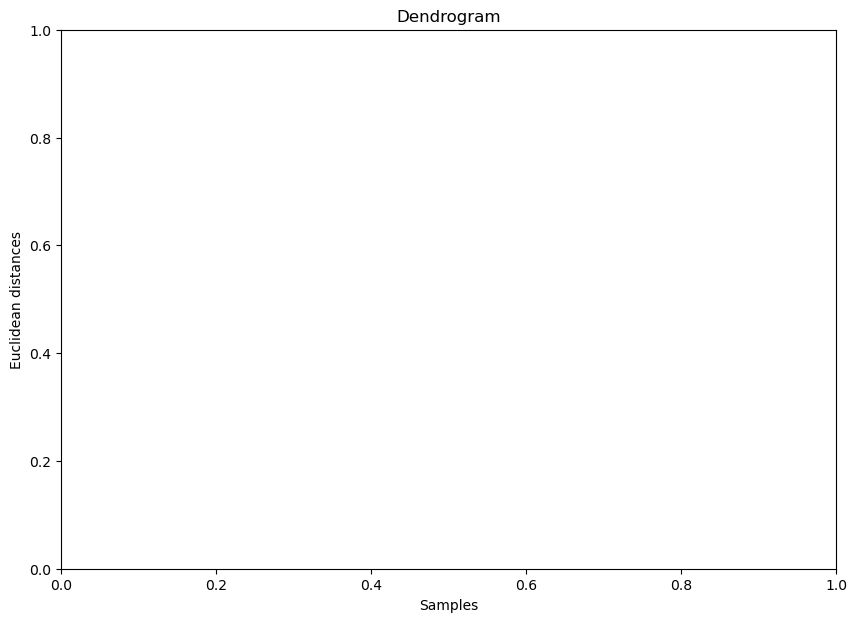

In [10]:
# agglomerative hierarchical clustering
import scipy.cluster.hierarchy as sch

# create dendrogram
sch.dendrogram(sch.linkage(pca_scaled,method='ward')) #ward method minimises variance within clusters, fixed syntax

#plot the dendrogram
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
# 'affinity' was removed in recent versions of scikit-learn — use 'metric' or omit it for linkage='ward'
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [12]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

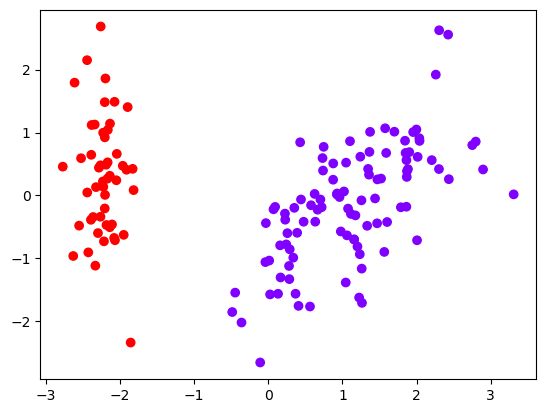

In [13]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_,cmap='rainbow')

In [15]:
import sklearn.metrics as metrics

silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(X_scaled)
    score = metrics.silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

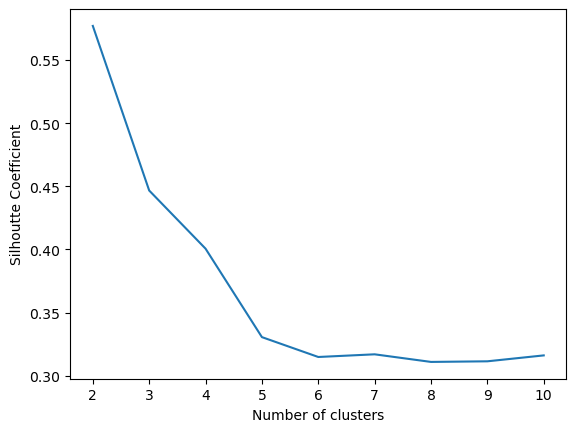

In [16]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.show() #Higher the silhouette coefficient, better the clusters; here 3 clusters seems to be the best; which also lies between +1 and -1